In [2]:
# Basic setting
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Optimization of Linear Regression

In [3]:
# Load the dataset
with open('./data/linear_regression.pickle', 'rb') as f:
    X, y = pickle.load(f)

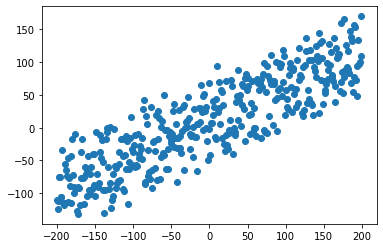

In [4]:
# Check the dataset distribution    
plt.scatter(X, y)
plt.show()

## [P.1] 데이터를 학습 데이터와 평가 데이터로 나누기

In [5]:
# Use sklearn library
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

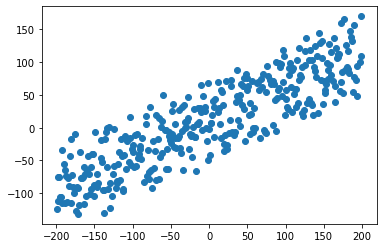

In [7]:
# Visualize train dataset  
plt.scatter(X_train, y_train)
plt.show()

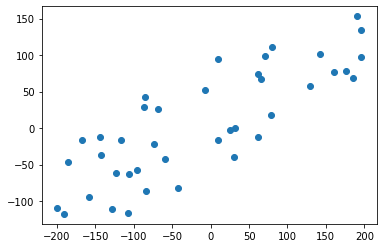

In [8]:
# Visualize test dataset  
plt.scatter(X_test, y_test)
plt.show()

## [P.2] <font color=red>numpy</font> 라이브러리를 활용해, 최적의 선형 회귀 모델 찾기

- 최적의 모델은 모든 데이터에 대해 실제값과 예측값의 차이가 제일 작은 모델
- 선형 회귀 모델은  일반적으로 <font color=red>MSE(Mean Squared Error)</font> 손실을 최소화하도록 학습
- 손실 함수와 모델 파라미터의 gradient에 관한 빈칸 부분 채워넣기

**MSE 손실 함수**
\begin{equation*}
\left( \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))^2 \right)
\end{equation*}

**Gradients 계산**
\begin{equation*}
\frac{\partial L}{\partial w} = -2 * \frac{1}{n} \sum_{i=1}^n ((y_i - (wX_i + b)) * X_i)
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial b} = -2 * \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))
\end{equation*}

In [9]:
#경사하강법완료
def gd_numpy(X, y, epochs, lr):
    # Model weights and bias parameters 초기화진행
    w = 0.0
    b = 0.0

    # Store model parameters and loss for visualization
    w_list, b_list, loss_list = [], [], []

    # Perform Gradient Descent
    for i in range(epochs):


    #################################################
    ######## Hint: use +, -, *, /, **, np.mean() ########
        loss = np.mean((y-(w*X+b))**2)   # MSE loss

        dw = -2*np.mean((y-(w*X+b))*X)   # derivative w.r.t to w
        db = -2*np.mean(y-(w*X+b))   # derivative w.r.t to b
    #################################################


        w = w - dw*lr   # update w
        b = b - db*lr   # update b

        w_list.append(w)
        b_list.append(b)
        loss_list.append(loss)

    print('Trained model weights : %.4f' % w)
    print('Trained model bias : %.4f' % b)
    
    return w, b, w_list, b_list, loss_list

In [10]:
# Training setting
epochs = 1000
learning_rate = 1e-7

w, b, w_list, b_list, loss_list = gd_numpy(X_train, y_train, epochs, learning_rate)

Trained model weights : 0.4843
Trained model bias : 0.0020


In [11]:
# get train loss
y_pred = w*X_train +b

train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % train_loss)

Train Loss for LinearRegression model : 1210.1167


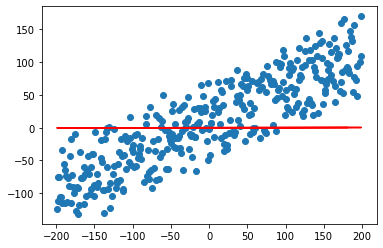

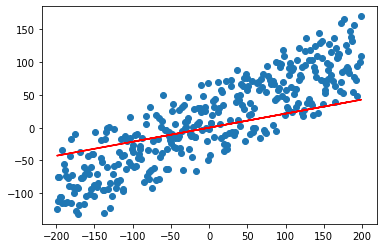

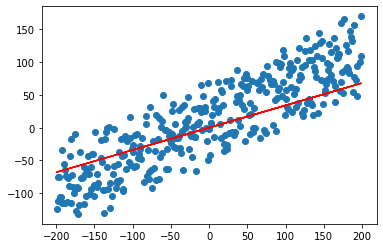

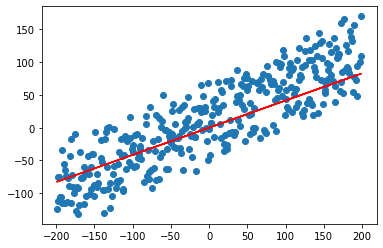

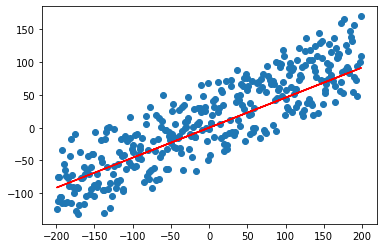

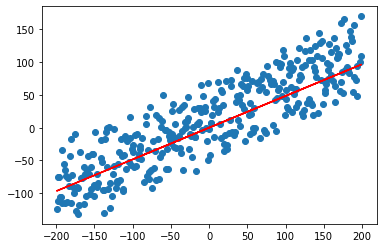

In [12]:
# Visualize the intermediate trained model
nums = 6 
epochs_list = [round(epochs / (nums-1) * n+1) for n in range(nums)]

for i in range(len(epochs_list)):
    plt.scatter(X_train, y_train)   # scatter the original data
    
    # Load trained weights in specific epoch
    epoch = epochs_list[i] - 1   # In python, all indexes start from 0
    
    if epoch >= 1000:
        epoch = 999
        
    w = w_list[epoch]
    b = b_list[epoch]
    
    y_pred=w*X_train+b
    plt.plot(X_train, y_pred, color='red')
    plt.show()

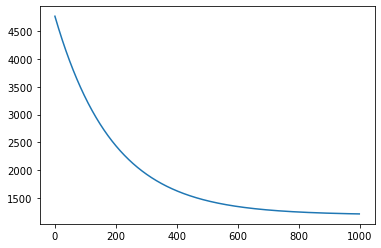

In [13]:
# Visualize the change of loss
plt.plot(loss_list)
plt.show()

### 평가 데이터에 대한 예측 결과는 다음과 같음

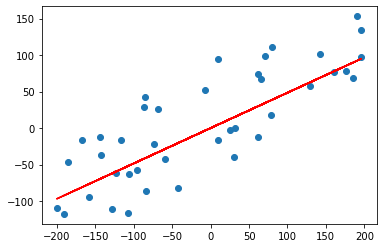

In [14]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_test, y_test)   

# plot prediction results
y_pred = w*X_test+b

plt.plot(X_test, y_pred, color='red')
plt.show()

### 학습된 선형 회귀 모델의 성능은 평가 데이터셋에 대한 손실임

In [15]:
test_loss = np.mean((y_test - y_pred)**2)
print('Test Loss for LinearRegression model : %.4f' % test_loss)

Test Loss for LinearRegression model : 1955.3655


## [P.3] <font color=red>sklearn</font> 라이브러리의 `LinearRegression` 모델을 활용해, 최적의 선형 회귀 모델 찾기

- 이 모듈은 경사하강법 대신 최소제곱법(Least Squares Method)를 사용해 모델 학습

In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

In [17]:
X.shape[0]

400

In [18]:
def lr_sklearn(X, y):
    X_2d = X.reshape(X.shape[0],-1)
    
    reg = LinearRegression().fit(X_2d, y)
    
    w = reg.coef_
    b = reg.intercept_

    print('Trained model weights : %.4f' % w)
    print('Trained model bias : %.4f' % b)
    
    return reg

In [19]:
model = lr_sklearn(X_train, y_train)

Trained model weights : 0.5210
Trained model bias : 9.9940


In [20]:
# get train loss
y_pred = model.predict(X_train.reshape(X_train.shape[0],-1))

train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % train_loss)

Train Loss for LinearRegression model : 1091.9456


### 평가 데이터에 대한 예측 결과는 다음과 같이 시각화

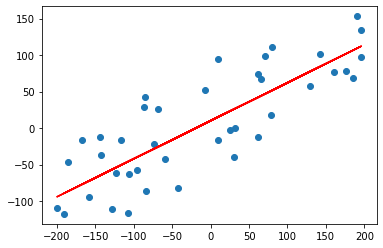

In [21]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_test, y_test)   

# plot prediction results
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

plt.plot(X_test, y_pred, color='red')
plt.show()

In [22]:
# get test loss
test_loss = np.mean((y_test - y_pred)**2)
print('Test Loss for LinearRegression model : %.4f' % test_loss)

Test Loss for LinearRegression model : 1834.5224


## [P.4] <font color=red>sklearn</font> 라이브러리의 `SGDRegression` 모델을 활용해, 최적의 선형 회귀 모델 찾기

- 이 모듈은 경사하강법을 사용해 모델 학습

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
from sklearn.linear_model import SGDRegressor

In [24]:
def gd_sklearn(X, y, epochs, lr, alpha):
    X_2d = X.reshape(X.shape[0],-1)
    
    reg = SGDRegressor(penalty='l2', 
                       alpha=alpha,
                       max_iter=epochs,
                       tol=1e-3,
                       learning_rate='invscaling',
                       eta0=lr,
                       random_state=42)
    
    reg.fit(X_2d, y)
    
    w = reg.coef_
    b = reg.intercept_

    print('Trained model weights : %.4f' % w)
    print('Trained model bias : %.4f' % b)
    
    return reg

In [25]:
# training setting
epochs = 1000
lr = 1e-5
alpha = 0.001

model = gd_sklearn(X_train, y_train, epochs, lr, alpha)

Trained model weights : 0.5177
Trained model bias : 0.0850


In [27]:
# get train loss
y_pred = model.predict(X_train.reshape(X_train.shape[0],-1))

train_loss = np.mean((y_train - y_pred)**2)
print('Train Loss for LinearRegression model : %.4f' % train_loss)

Train Loss for LinearRegression model : 1190.3299


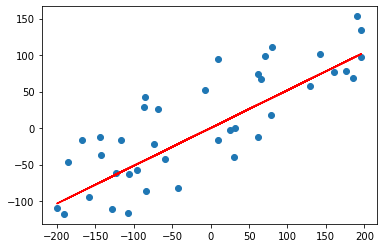

In [34]:
# Visualize the trained linear regression model
# scatter the original data
plt.scatter(X_test, y_test)   

# plot prediction results
y_pred = model.predict(X_test.reshape(X_test.shape[0],-1))

plt.plot(X_test, y_pred, color='red')
plt.show()

In [35]:
# get test loss
test_loss = np.mean((y_test - y_pred)**2)
print('Test Loss for LinearRegression model : %.4f' % test_loss)

Test Loss for LinearRegression model : 1960.0509


`sklearn` 라이브러리를 사용하면, 별도의 gradient 계산 없이 모델을 쉽게 학습시킬 수 있음